## Javad Ranjbar Kermani
## 400209795
## Question 1, Part b
## Multi Layer Perceptron

In [1]:
#import librarires
import torch
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating a dataframe from the give data
df = pd.DataFrame([[2,1,0],[3,2,0],[-4,-1,0],[-1,-3,0],[2,-1,1],[3,-3,1],
                  [-2,1,1],[-4,-2,1]],columns=['x1','x2','Y'])
df.head()

,x1,x2,Y
0,2,1,0
1,3,2,0
2,-4,-1,0
3,-1,-3,0
4,2,-1,1


In [3]:
# converting dataframe to pytorch tensor
inputs = torch.tensor(df.iloc[:,[0,1]].values, dtype=torch.float32) # Features
targets = torch.tensor(df.iloc[:,[2]].values, dtype=torch.float32) # Labels
data = list(zip(inputs, targets)) # Dataset


In [4]:
from torch.utils.data import TensorDataset, DataLoader
BATCH_SIZE = 2 # number of batch size
# Create a TensorDataset
dataset = TensorDataset(inputs, targets) 
# Create a DataLoader with batch size of 2, 4, 8
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True) #change with 2,4,8
print(len(dataloader))

4


In [5]:
import torch.nn as nn
import torch.optim as optim
# Creat a three layer perceptron
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(2, 3, bias = True) # layers 1 & 2
        self.layer1.weight.data = torch.tensor([[0.1,-0.29],[-0.72,0.12],[0.94,0.44]]) # initialize with Given weights between layer 1, 2.
        self.layer1.bias.data.fill_(0) # initialize all bias to zero 
        self.layer2 = nn.Linear(3, 1, bias = True) # layers 2 & 3
        self.layer2.weight.data = torch.tensor([[1,-1.16,-0.26]]) # initialize with Given weights between layer 2, 3.
        self.layer2.bias.data.fill_(0) # initialize all bias to zero
        self.sigmoid = nn.Sigmoid() # output layer acctivation function
        self.tanh = nn.Tanh() # hidden layer acctivation function

    def forward(self, x):
        x = self.layer1(x)
        x = self.tanh(x)
        x = self.layer2(x)
        x = self.sigmoid(x)

        return x

In [6]:
model = NeuralNetwork() #Create a object
criterion = nn.MSELoss() # Mean square error loss
optimizer = optim.SGD(model.parameters(), lr = 0.01) # stochastic gradient descent optimizer

In [7]:
epoch = 20 # number of epochs
train_loss_history = [] 


for e in range(epoch):
  train_loss = 0
  train_corrects = 0

  for i,(batch_inputs, batch_labels) in enumerate(dataloader,0):
    outputs = model(batch_inputs) # every batch is put as an input
    loss = criterion(outputs, batch_labels) # Calc loss after each batch by comparing it to actual labels

    optimizer.zero_grad() # setting the initila gradient to zero
    loss.backward() # backpropagation the loss
    optimizer.step() # optimizing the weights and bias values for every single step 
    
    _, preds = torch.max(outputs, 1) # taking the highest value of prediction
    train_loss += loss.item() # calculating the loss and adding to train_loss
    #train_corrects += torch.sum(preds == batch_labels.data) # calculating the accuracy by taking the sum of all correct prediction in a batch
    epoch_loss = train_loss/(i+1) # loss per epoch
  train_loss_history.append(epoch_loss)

  print('epoch :', (e+1))
  print('train loss: {:.4f}'.format(epoch_loss))

epoch : 1
train loss: 0.3045
epoch : 2
train loss: 0.3006
epoch : 3
train loss: 0.2959
epoch : 4
train loss: 0.2922
epoch : 5
train loss: 0.2892
epoch : 6
train loss: 0.2853
epoch : 7
train loss: 0.2815
epoch : 8
train loss: 0.2795
epoch : 9
train loss: 0.2764
epoch : 10
train loss: 0.2742
epoch : 11
train loss: 0.2729
epoch : 12
train loss: 0.2695
epoch : 13
train loss: 0.2689
epoch : 14
train loss: 0.2665
epoch : 15
train loss: 0.2644
epoch : 16
train loss: 0.2624
epoch : 17
train loss: 0.2617
epoch : 18
train loss: 0.2607
epoch : 19
train loss: 0.2587
epoch : 20
train loss: 0.2583


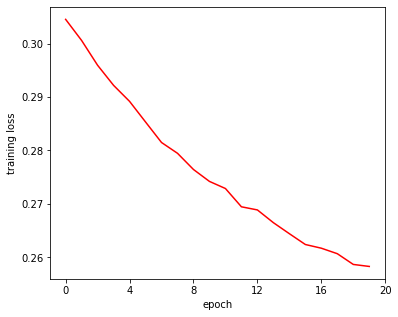

In [8]:
# plotting the loss with respect to number of epochs
import math
plt.figure(figsize=(6,5))
plt.plot(train_loss_history, color = 'red')
X = [0,4,8,12,16,20]
new_list = range(math.floor(min(X)), math.ceil(max(X))+1, 4)
plt.xticks(new_list)
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.show()

In [9]:
# parameters of the trained model
for name, param in model.named_parameters():
  print(name,param)

layer1.weight Parameter containing:
tensor([[-0.0484, -0.3324],
        [-0.7167,  0.0510],
        [ 0.9416,  0.4390]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.0180,  0.0289, -0.0017], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 1.0073, -1.0979, -0.3107]], requires_grad=True)
layer2.bias Parameter containing:
tensor([-0.0310], requires_grad=True)
